En este Notebook realizamos la pipeline de procesaminto del conjunto de Train.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_table('Modelar_UH2019.txt', sep = '|', dtype={'HY_cod_postal':str})

In [3]:
def ArreglarProvincias(df):
    # Diccionario de los códigos postales. 'xxddd' --> xx es el código asociado a la provincia
    diccionario_postal = {'02':'Albacete',
    '03':'Alicante',
    '04':'Almería',
    '01':'Álava',
    '33':'Asturias',
    '05':'Avila',
    '06':'Badajoz',
    '07':'Baleares', 
    '08':'Barcelona',
    '48':'Bizkaia',
    '09':'Burgos',
    '10':'Cáceres',
    '11':'Cádiz',
    '39':'Cantabria',
    '12':'Castellón',
    '13':'Ciudad Real',
    '14':'Córdoba',
    '15':'A Coruña',
    '16':'Cuenca',
    '20':'Gipuzkoa',
    '17':'Gerona',
    '18':'Granada',
    '19':'Guadalajara',
    '21':'Huelva',
    '22':'Huesca',
    '23':'Jaén',
    '24':'León',
    '25':'Lérida',
    '27':'Lugo',
    '28':'Madrid',
    '29':'Málaga',
    '30':'Murcia',
    '31':'Navarra',
    '32':'Ourense',
    '34':'Palencia',
    '35':'Las Palmas',
    '36':'Pontevedra',
    '26':'La Rioja',
    '37':'Salamanca',
    '38':'Tenerife',
    '40':'Segovia',
    '41':'Sevilla',
    '42':'Soria',
    '43':'Tarragona',
    '44':'Teruel',
    '45':'Toledo',
    '46':'Valencia',
    '47':'Valladolid',
    '49':'Zamora',
    '50':'Zaragoza',
    '51':'Ceuta',
    '52':'Melilla'}
    
    # Los códigos postales que nos faltan
    codigos_postales = df.loc[df.HY_provincia.isnull()].HY_cod_postal
    
    # Recorremos la pareja index, value
    for idx, cod in zip(codigos_postales.index, codigos_postales):
        # Del cod solo nos interesan los dos primeros valores para la provincia.
        df.loc[idx,'HY_provincia'] = diccionario_postal[cod[:2]]
        
    # Devolvemos el df de las provincias
    return df

In [4]:
df = ArreglarProvincias(df)

### Metros

In [5]:
# Volvemos Nans los valores de 0m^2 o inferior
df.loc[df['HY_metros_utiles'] <= 0,'HY_metros_utiles'] = np.nan
df.loc[df['HY_metros_totales'] <= 0,'HY_metros_totales'] = np.nan

# Obtenemos las posiciones de los valores faltantes een los metros útiles
posiciones_nans = df['HY_metros_totales'].isnull()

# Rellenamos los Nans con los metros totales
df.loc[posiciones_nans,'HY_metros_totales'] = df.loc[posiciones_nans,'HY_metros_utiles']

# Obtenemos las posiciones de los valores faltantes een los metros útiles
posiciones_nans = df['HY_metros_utiles'].isnull()

# Rellenamos los Nans con los metros totales
df.loc[posiciones_nans,'HY_metros_utiles'] = df.loc[posiciones_nans,'HY_metros_totales']

# Si continuamos teniendo Nans
if df[['HY_metros_utiles', 'HY_metros_totales']].isnull().sum().sum()>0: # Hay 2 .sum para sumarlo todo
    # Agrupamos por HY_tipo
    group_tipo = df[['HY_tipo', 'HY_metros_utiles', 'HY_metros_totales']].dropna().groupby('HY_tipo').mean()
    # Cuales son los indices de los registros que tienen nans
    index_nans = df.index[df['HY_metros_utiles'].isnull()]
    for i in index_nans:
        tipo = df.loc[i, 'HY_tipo']
        df.loc[i, ['HY_metros_utiles', 'HY_metros_totales']] = group_tipo.loc[tipo]
        
# Eliminamos los outliers
# Definimos la cota a partir de la cual son outliers
cota = df['HY_metros_utiles'].mean()+3*df['HY_metros_utiles'].std()
# Y nos quedamos con todos aquellos que no la superan
df = df[df['HY_metros_utiles'] <= cota]
# Idem para metros totales
# Definimos la cota a partir de la cual son outliers
cota = df['HY_metros_totales'].mean()+3*df['HY_metros_totales'].std()
# Y nos quedamos con todos aquellos que no la superan
df = df[df['HY_metros_totales'] <= cota]

# Por último, eliminamos los registros que presenten una diferencia excesiva de metros
dif_metros = np.abs(df.HY_metros_utiles - df.HY_metros_totales)
df = df[dif_metros <= 500]

### Outlier en antigüedad

In [6]:
df = df[df['HY_antiguedad']<= 2019]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
2,6028502,03740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
7,6028520,04120,Almería,Local comercial en bruto en la planta baja de ...,NaN,Local,2009.0,931.17,956.98,0,...,4.99,731.75,93.0,51.06,168,0.50,7.26,1,46,80.40
14,6028533,29470,Málaga,Chalet adosado de dos plantas que consta de cu...,La vivienda está compuesta de dos plantas. En ...,Chalet adosado,1989.0,90.93,109.00,1,...,NaN,NaN,NaN,0.00,1920,32.80,17.37,1,42,64.46
15,6028534,46370,Valencia,Casa unifamiliar de tres plantas sobre rasante...,La vivienda se distribuye en tres plantas. La ...,Casa de pueblo,1997.0,452.16,528.91,2,...,5.43,583.77,54.0,51.05,896,30.94,14.94,1,47,71.25
16,6028539,46800,Valencia,Casa unifamiliar de tres dormitorios y dos bañ...,La vivienda se compone de dos alturas la plan...,Casa de pueblo,1930.0,134.83,154.27,2,...,NaN,NaN,NaN,0.00,671,18.21,10.71,1,47,41.41
17,6028541,46724,Valencia,Chalet adosado de tres plantas con cuatro dorm...,La vivienda se distribuye en tres plantas. La ...,Chalet adosado,2006.0,190.55,217.37,2,...,4.34,525.00,6.0,50.41,677,11.64,14.15,1,47,62.55
18,6028544,46721,Valencia,Piso de dos dormitorios y un cuarto de baño ub...,La vivienda está distribuida en tres dormitori...,Piso,1969.0,82.11,90.32,1,...,5.25,335.00,6.0,51.79,241,6.52,5.19,1,47,45.39
19,6028545,46292,Valencia,Piso de cuatro dormitorios y dos baños situado...,"La vivienda consta de recibidor, salón-comedor...",Piso,2008.0,109.86,145.42,2,...,NaN,NaN,NaN,0.00,387,33.44,23.20,1,47,88.88
21,6028575,25400,Lérida,"Casa unifamiliar de cinco dormitorios, un baño...",La vivienda consta de tres plantas. Planta baj...,Casa de pueblo,1940.0,427.00,427.00,1,...,3.49,292.00,6.0,53.68,295,13.56,16.65,1,47,59.07
22,6028582,04409,Almería,Casa Unifamiliar de tres dormitorios y un baño...,La vivienda se compone de dos alturas:La plant...,Casa de pueblo,1998.0,119.24,167.00,1,...,NaN,NaN,NaN,0.00,288,7.84,13.98,1,47,39.15


### Precio anterior

Creamos una nueva variable que sea ¿Existe precio anterior?--> Si/No

In [7]:
df['PV_precio_anterior'] = df['HY_precio_anterior'].isnull()

Y modificamos precio anterior para que tenga los valores del precio actual como anterior

In [8]:
df.loc[df['HY_precio_anterior'].isnull(),'HY_precio_anterior'] = df.loc[df['HY_precio_anterior'].isnull(),'HY_precio']

Eliminamos los outliers

In [9]:
# Eliminamos los outliers
# Definimos la cota a partir de la cual son outliers
cota = df['HY_precio'].mean()+3*df['HY_precio'].std()
# Y nos quedamos con todos aquellos que no la superan
df = df[df['HY_precio'] <= cota]
# Idem para metros totales
# Definimos la cota a partir de la cual son outliers
cota = df['HY_precio_anterior'].mean()+3*df['HY_precio_anterior'].std()
# Y nos quedamos con todos aquellos que no la superan
df = df[df['HY_precio_anterior'] <= cota]

Y eliminamos también los precios irrisorios (Todos aquellos precios inferiores a 100€)


In [10]:
v = df[['HY_precio', 'HY_precio_anterior']].apply(lambda x: x[0] <= 100 and x[1] <= 100, axis = 1)
df = df[v == False]

### Descripción y distribución

Creamos 2 nuevas variables que almacenen la longitud del texto de las anteriores

In [11]:
# Igualamos los NaN a carácteres vacíos
df.loc[df['HY_descripcion'].isnull(),'HY_descripcion'] = ''
df.loc[df['HY_distribucion'].isnull(),'HY_distribucion'] = ''

# Calculamos su longitud
df['PV_longitud_descripcion'] = df['HY_descripcion'].apply(lambda x: len(x))
df['PV_longitud_distribucion'] = df['HY_distribucion'].apply(lambda x: len(x))

### Columna de cantidad de imágenes
Añadimos una nueva columna que es la cantidad de imágenes que tiene asociado el piso

In [26]:
from zipfile import ZipFile
file_name = "imagenes_inmuebles_haya.zip"

lista_images = []
lista_posiciones = []
lista_caracteres_aleatorios = []

with ZipFile(file_name, 'r') as zip_file: 
    for info in zip_file.infolist()[1:]: # El primero no alberga imagen
        filename = info.filename.split('/')[1] # El formato es 'imagenes_inmuebles_haya/6028499__posifoto1__qm2eBORaFws.jpg'
        parts = filename.split('__')
        lista_images.append(int(parts[0]))
        lista_posiciones.append(parts[1])
        lista_caracteres_aleatorios.append(parts[2])
        
# Y montamos el dataframe
df_imagenes = pd.DataFrame({'HY_id':lista_images, 'Posiciones':lista_posiciones, 'Aleatorios':lista_caracteres_aleatorios})

# Guardamos el Dataframe para no tener que volver a hacer esto
df_imagenes.to_csv('df_info_imagenes.csv', sep = '|', index = False, encoding = 'utf-8')

Veamos que aspecto presenta nuestro dataframe

In [13]:
df_imagenes.groupby('HY_id').count().head()

,Aleatorios,Posiciones
HY_id,,
6028499,5,5
6028500,3,3
6028502,10,10
6028512,2,2
6028513,2,2


In [14]:
df_count_imagenes = df_imagenes.groupby('HY_id').count()['Posiciones']

In [15]:
def AñadirCantidadImagenes(x):
    try:
        return df_count_imagenes.loc[x]
    except:
        return 0

df['PV_cantidad_imagenes'] = df['HY_id'].apply(lambda x: AñadirCantidadImagenes(x))

Veamos las cantidades.

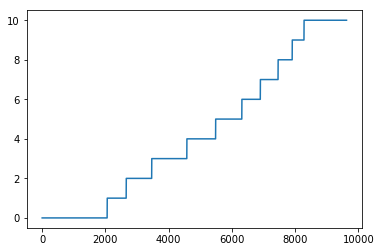

In [16]:
plt.plot(df.PV_cantidad_imagenes.sort_values().values)
plt.show()

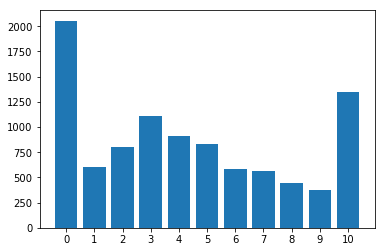

In [17]:
datos = df.PV_cantidad_imagenes.value_counts()
datos = datos.sort_index()

plt.bar(range(len(datos)), datos.values)
plt.xticks(range(len(datos.index)),datos.index)
plt.show()

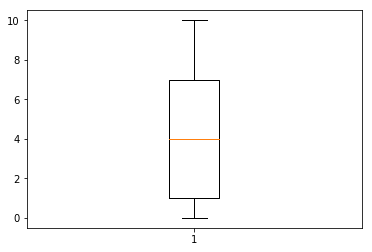

In [18]:
plt.boxplot(df.PV_cantidad_imagenes.values)
plt.show()

### Veriables IDEA

In [19]:
var_list = [
    ['IDEA_pc_1960', 'IDEA_pc_1960_69', 'IDEA_pc_1970_79', 'IDEA_pc_1980_89','IDEA_pc_1990_99', 'IDEA_pc_2000_10'],
    ['IDEA_pc_comercio','IDEA_pc_industria', 'IDEA_pc_oficina', 'IDEA_pc_otros','IDEA_pc_residencial', 'IDEA_pc_trast_parking'],
    ['IDEA_ind_tienda', 'IDEA_ind_turismo', 'IDEA_ind_alimentacion'],
    ['IDEA_ind_riqueza'],
    ['IDEA_rent_alquiler'],
    ['IDEA_ind_elasticidad', 'IDEA_ind_liquidez'],
    ['IDEA_unitprice_sale_residential', 'IDEA_price_sale_residential', 'IDEA_stock_sale_residential'],
    ['IDEA_demand_sale_residential'],
    ['IDEA_unitprice_rent_residential', 'IDEA_price_rent_residential', 'IDEA_stock_rent_residential'],
    ['IDEA_demand_rent_residential']   
]

In [20]:
def InfoNans(df, vars_imput):
    nans_zona = df[vars_imput].isnull().sum(axis = 1)
    print('Hay {} registros sin ningún Nan'.format(np.sum(nans_zona == 0)))
    print('Hay {} registros con todo Nan'.format(np.sum(nans_zona == len(vars_imput))))
    print('Hay {} con mix'.format(nans_zona.shape[0]-np.sum(nans_zona == 0)-np.sum(nans_zona == len(vars_imput))))

def InfoImputarNans(df, vars_imput):
    # Vemos cuantos Nans hay.
    InfoNans(df, vars_imput)
    
    # Obtenemos nuestros df
    group_cp = df[['HY_cod_postal']+vars_imput].dropna().groupby('HY_cod_postal').mean()
    group_provincia = df[['HY_provincia']+vars_imput].dropna().groupby('HY_provincia').mean()
    
    # Info útil
    print('Se han descartado {} códigos postales por ser todo Nans'.format(df['HY_cod_postal'].unique().shape[0]-group_cp.shape[0]))
    print('Se han descartado {} provincias por ser todo Nans'.format(df['HY_provincia'].unique().shape[0]-group_provincia.shape[0]))
    
    # Aprovechando la propiedad de que las seis variables son Nans simultaneamente podemmos hacer lo siguiente para obtener
    #      dichos códigos
    codigos_nans = df.HY_cod_postal[df[vars_imput[0]].isnull()] # Valdría cualquiera de las 6 variables.
    
    a = codigos_nans.unique().shape[0]
    b = np.intersect1d(codigos_nans.unique(),group_cp.index).shape[0]
    print('Dentro de los {} codigos de codigos_nans, hay {} códigos que conseguiremos completar y {} que no (Los CP que no están registrados en group_cp)'.format(a,b,a-b))

def ImputarNans_cp(df, vars_imput, var):
    '''
    df --> Nuestro dataframe a modificar
    vars_imput --> Variables que queremos imputar.
    var --> Variable por la que queremos realizar la agrupación (HY_cod_postal ó HY_provincia)
    '''
    # Obtenemos nuestros df de grupos
    group_cp = df[[var]+vars_imput].dropna().groupby(var).mean()
    
    # Obtenemos los CP que son Nans
    codigos_nans = df.loc[df[vars_imput[0]].isnull(), var] # Valdría cualquiera de las 6 variables.
    
    # Como sabemos que códigos podremos completar y cuales no, solo utilizaremos los que se pueden completar
    cods = np.intersect1d(codigos_nans.unique(),group_cp.index)
    # Cuales son los índices de los Nans
    index_nan = df.index[df[vars_imput[0]].isnull()]
    for cod in cods:
        # Explicación del indexado: De todos los códigos que coinciden con el nuestro nos quedamos con los que tienen índice
        #      nan, y para poder acceder a df, necesitamos los índices de Nan que cumplen lo del código.
        i = index_nan[(df[var] == cod)[index_nan]]
        df.loc[i, vars_imput] = group_cp.loc[cod].values
    
    # Vemos cuantos Nans hay.
    InfoNans(df, vars_imput)
    
    # Devolvemos los dataframes
    return df, group_cp

In [21]:
for vars_group in var_list:
    print('*'*50)
    print('Variables:', vars_group)
    print('-'*10+' CP '+'-'*10)
    df, group_cp = ImputarNans_cp(df, vars_group, var = 'HY_cod_postal')
    print('-'*10+' Provincias '+'-'*10)
    df, group_provincia = ImputarNans_cp(df, vars_group, var = 'HY_provincia')
    
    # Si aún quedan Nans los ponemos a todos con la media de todo
    registros_faltantes = df[vars_group[0]].isnull().sum()
    if registros_faltantes>0:
        print('-'*30)
        df.loc[df[vars_group[0]].isnull(), vars_group] = group_provincia.mean(axis = 0).values
        print('Se han imputado {} registros por la media de todo'.format(registros_faltantes))
        
    df.to_csv('./DF_grupos/df_filled_{}.csv'.format(vars_group[0]), sep = '|', encoding='utf-8', index = False)
    group_cp.to_csv('./DF_grupos/group_cp_{}.csv'.format(vars_group[0]), sep = '|', encoding='utf-8')
    group_provincia.to_csv('./DF_grupos/group_prov_{}.csv'.format(vars_group[0]), sep = '|', encoding='utf-8')

**************************************************
Variables: ['IDEA_pc_1960', 'IDEA_pc_1960_69', 'IDEA_pc_1970_79', 'IDEA_pc_1980_89', 'IDEA_pc_1990_99', 'IDEA_pc_2000_10']
---------- CP ----------
Hay 9457 registros sin ningún Nan
Hay 168 registros con todo Nan
Hay 0 con mix
---------- Provincias ----------
Hay 9624 registros sin ningún Nan
Hay 1 registros con todo Nan
Hay 0 con mix
------------------------------
Se han imputado 1 registros por la media de todo
**************************************************
Variables: ['IDEA_pc_comercio', 'IDEA_pc_industria', 'IDEA_pc_oficina', 'IDEA_pc_otros', 'IDEA_pc_residencial', 'IDEA_pc_trast_parking']
---------- CP ----------
Hay 9457 registros sin ningún Nan
Hay 168 registros con todo Nan
Hay 0 con mix
---------- Provincias ----------
Hay 9624 registros sin ningún Nan
Hay 1 registros con todo Nan
Hay 0 con mix
------------------------------
Se han imputado 1 registros por la media de todo
**************************************************

### Indice elasticidad
Creamos  una nueva variable que redondea el indice de elasticidad al entero más cercano

In [22]:
df['PV_ind_elasticidad'] = np.round(df['IDEA_ind_elasticidad'])

### Definimos la variable de antigüedad de la zona
Primero tomaremos las variables [IDEA_pc_1960,IDEA_pc_1960_69,IDEA_pc_1970_79,IDEA_pc_1980_89,IDEA_pc_1990_99,IDEA_pc_2000_10] y las transformaremos en solo 3. Y luego nos quedaremos con el máximo de esas tres para determinar el estado de la zona.

In [23]:
df['Viejos'] = df[['IDEA_pc_1960', 'IDEA_pc_1960_69']].sum(axis = 1)
df['Medios'] = df[['IDEA_pc_1970_79', 'IDEA_pc_1980_89']].sum(axis = 1)
df['Nuevos'] = df[['IDEA_pc_1990_99', 'IDEA_pc_2000_10']].sum(axis = 1)

df['PV_clase_piso'] = df[['Viejos','Medios','Nuevos']].idxmax(axis = 1)

# Guardamos el resultado

In [24]:
df.to_csv('df_train_arreglado1.csv', sep = '|', encoding='utf-8', index=False)